In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

## Generate Random Cities

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

## Retrieve weather data

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [28]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
cities[:5]

['kalakamati', 'bluff', 'punta arenas', 'saldanha', 'verkhoyansk']

In [13]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

d 39 of Set 3 | izhma
Processing Record 40 of Set 3 | glenwood springs
Processing Record 41 of Set 3 | kisangani
Processing Record 42 of Set 3 | lompoc
Processing Record 43 of Set 3 | san juan
Processing Record 44 of Set 3 | geraldton
Processing Record 45 of Set 3 | lokosovo
Processing Record 46 of Set 3 | victoria
Processing Record 47 of Set 3 | meulaboh
Processing Record 48 of Set 3 | jyllinge
Processing Record 49 of Set 3 | vestmannaeyjar
Processing Record 50 of Set 3 | shimoda
Processing Record 1 of Set 4 | faanui
Processing Record 2 of Set 4 | morant bay
Processing Record 3 of Set 4 | phayao
Processing Record 4 of Set 4 | khatanga
Processing Record 5 of Set 4 | muli
Processing Record 6 of Set 4 | sipovo
Processing Record 7 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 4 | marzuq
Processing Record 9 of Set 4 | severo-kurilsk
Processing Record 10 of Set 4 | pacific grove
Processing Record 11 of Set 4 | imperia
Processing Record 12 of Set 4 | el bagre
Pro

In [14]:
len(city_data)

559

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kalakamati,-20.5929,27.3121,80.60,57,75,14.97,BW,2021-03-23 14:08:48
1,Bluff,-46.6000,168.3333,54.00,98,100,5.93,NZ,2021-03-23 14:08:48
2,Punta Arenas,-53.1500,-70.9167,50.00,87,40,13.80,CL,2021-03-23 14:08:48
3,Saldanha,-33.0117,17.9442,96.80,17,18,11.50,ZA,2021-03-23 14:08:49
4,Verkhoyansk,67.5447,133.3850,-13.56,94,100,4.41,RU,2021-03-23 14:08:49
5,Vardo,70.3705,31.1107,33.80,80,0,28.77,NO,2021-03-23 14:08:49
6,New Norfolk,-42.7826,147.0587,64.00,69,100,1.01,AU,2021-03-23 14:09:55
7,Atuona,-9.8000,-139.0333,79.93,68,7,20.15,PF,2021-03-23 14:08:50
8,Arraial Do Cabo,-22.9661,-42.0278,84.20,70,20,10.36,BR,2021-03-23 14:08:50
9,Pundaguitan,6.3711,126.1689,81.86,79,100,18.95,PH,2021-03-23 14:09:56


In [17]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kalakamati,BW,2021-03-23 14:08:48,-20.5929,27.3121,80.60,57,75,14.97
1,Bluff,NZ,2021-03-23 14:08:48,-46.6000,168.3333,54.00,98,100,5.93
2,Punta Arenas,CL,2021-03-23 14:08:48,-53.1500,-70.9167,50.00,87,40,13.80
3,Saldanha,ZA,2021-03-23 14:08:49,-33.0117,17.9442,96.80,17,18,11.50
4,Verkhoyansk,RU,2021-03-23 14:08:49,67.5447,133.3850,-13.56,94,100,4.41
...,...,...,...,...,...,...,...,...,...
554,Santa Fe,AR,2021-03-23 14:12:13,-31.6333,-60.7000,72.68,64,0,5.44
555,Namatanai,PG,2021-03-23 14:12:13,-3.6667,152.4333,79.27,84,100,5.17
556,Dukat,RU,2021-03-23 14:12:13,62.5500,155.5500,-0.18,96,100,6.89
557,Sarakhs,IR,2021-03-23 14:12:13,36.5449,61.1577,75.20,29,0,13.80


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plotting

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import time module
import time

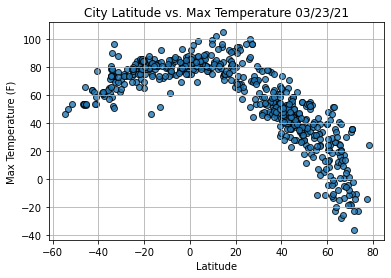

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

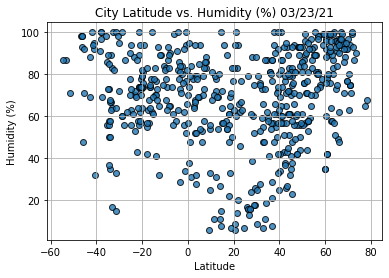

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

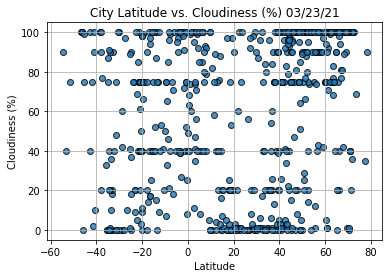

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

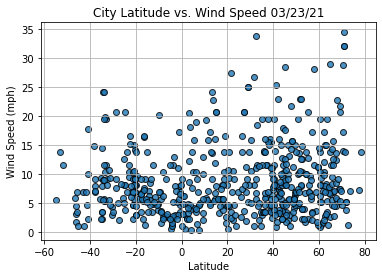

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()